# Iris Dataset

This dataset contains information on the iris species. Our challenge is to see how many species of the iris we have based on our information

In [44]:
# General libraries
import joblib
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics


# Data Obtainance, Preprocess and Explore

# Data Obtainance

In [45]:
# Load data
iris_data = load_iris(as_frame=True)['frame']
iris_unsupervised = load_iris(as_frame=True)['data']
targets = load_iris(as_frame=True)['target_names']

In [46]:
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [48]:
# View data
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
# Unsupervised data does not have a target
iris_unsupervised.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
# Check info
iris_unsupervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [51]:
# Check statistics
iris_unsupervised.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


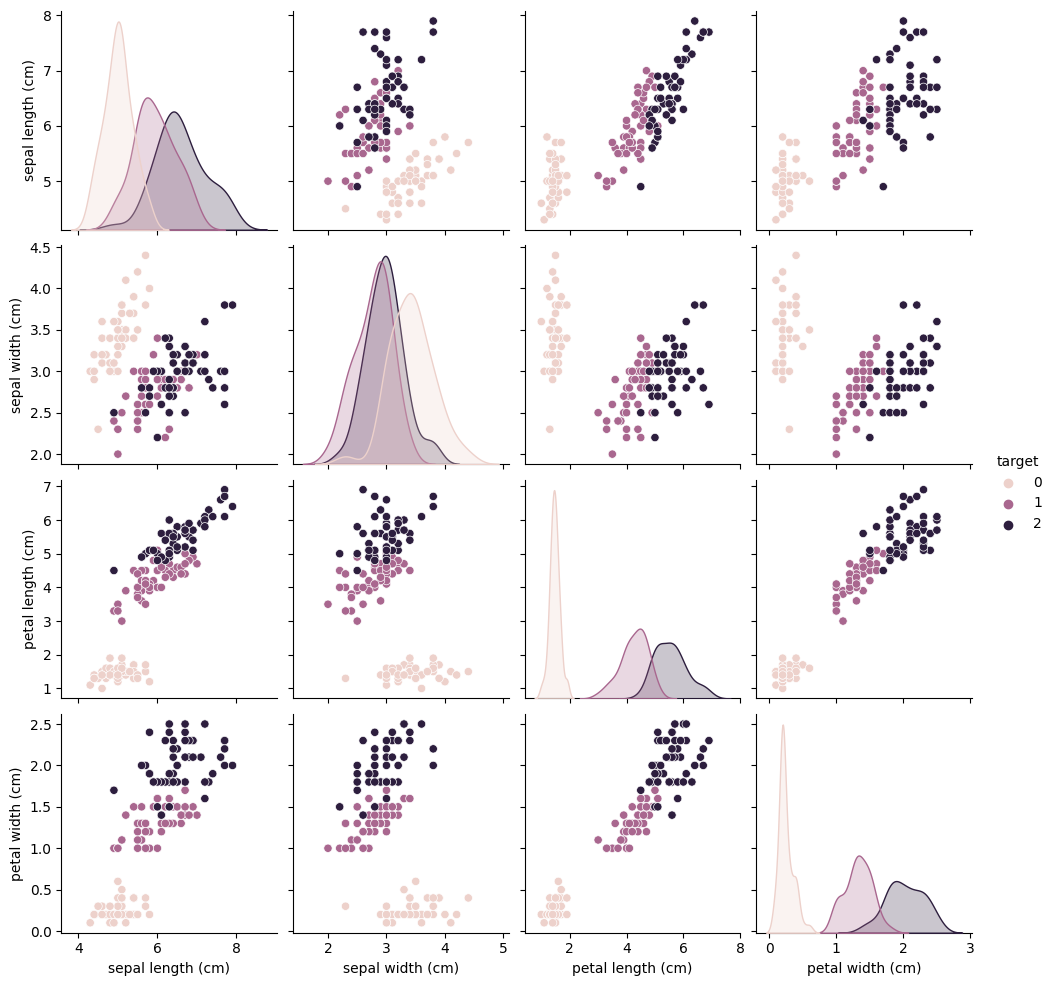

In [52]:
# Explore data with one plot
sns.pairplot(iris_data, hue='target')

# Modelling

# KMeans

C:\Users\Chemutai\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chemutai\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chemutai\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chemutai\AppData\Roaming\Python\Python39\site-packages\sklearn\c

Text(0.5, 1.0, 'Elbow Method')

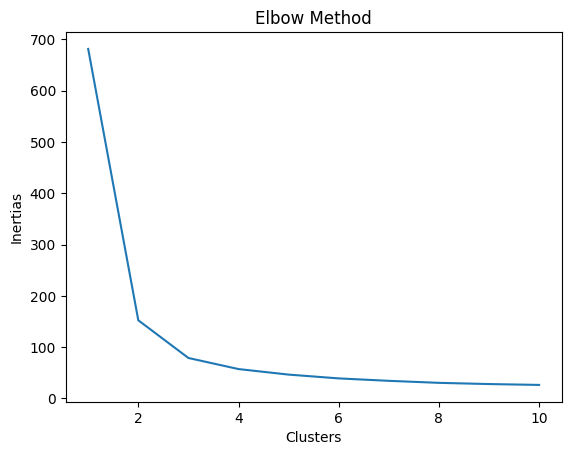

In [53]:
# Get optimum clusters
inertias = []
clusters = list(range(1,11))

for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(iris_unsupervised)
    inertias.append(kmeans.inertia_)

plt.plot(clusters, inertias)
plt.xlabel('Clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method')

In [54]:
# Instantiate model
kmeans = KMeans(n_clusters=3)

# Fit and Predict
labels = kmeans.fit_predict(iris_unsupervised)

# Evaluate algorithm
metrics.silhouette_score(iris_unsupervised, labels)

C:\Users\Chemutai\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5528190123564101

Text(0.5, 1.0, 'Cluster')

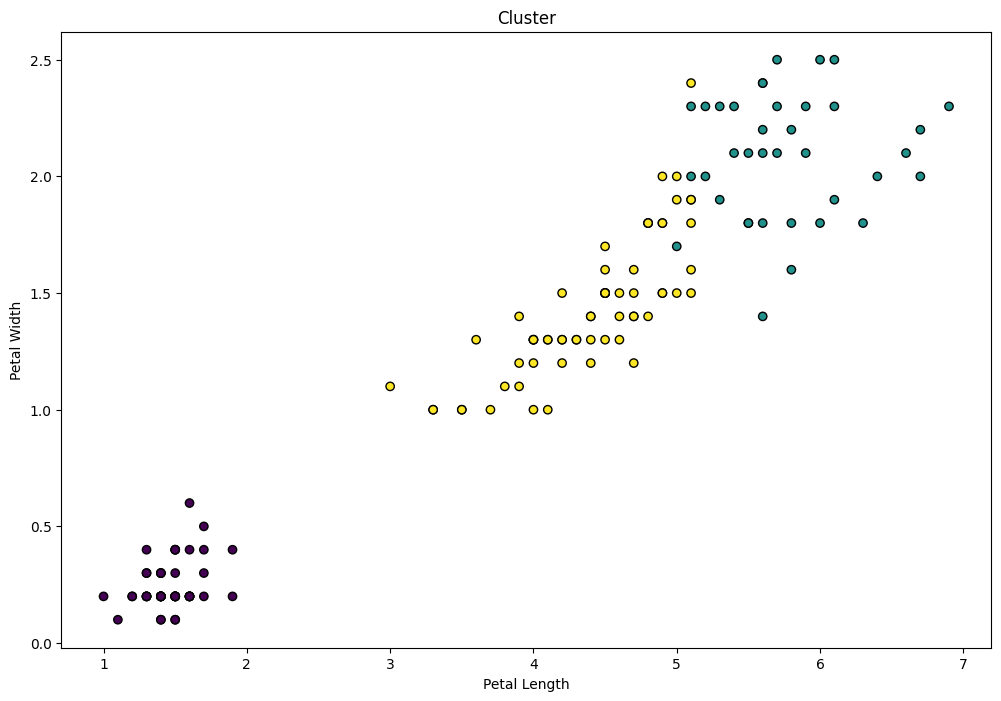

In [55]:
# Plot clusters
plt.figure(figsize = (12,8))
plt.scatter(iris_unsupervised['petal length (cm)'],
            iris_unsupervised['petal width (cm)'],
            c = labels, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Cluster')

# Hierarchical Clustering

Text(0.5, 1.0, 'Hierarchical Clustering')

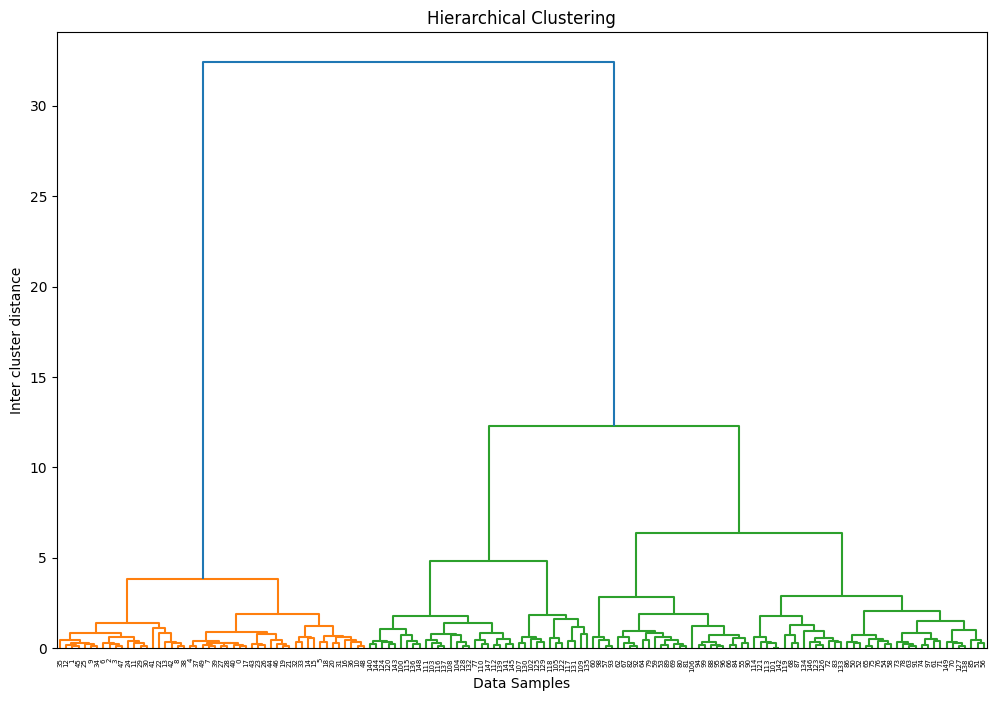

In [56]:
# Create a cluster matrix
linkage_matrix = linkage(iris_unsupervised, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(12,8))
dendrogram(linkage_matrix)
plt.xlabel('Data Samples')
plt.ylabel('Inter cluster distance')
plt.title('Hierarchical Clustering')


In [57]:
# Obtain labels
labels_hierarchical = fcluster(linkage_matrix, 3, criterion='maxclust')
metrics.silhouette_score(iris_unsupervised, labels_hierarchical)

0.5543236611296423

Text(0.5, 1.0, 'Cluster')

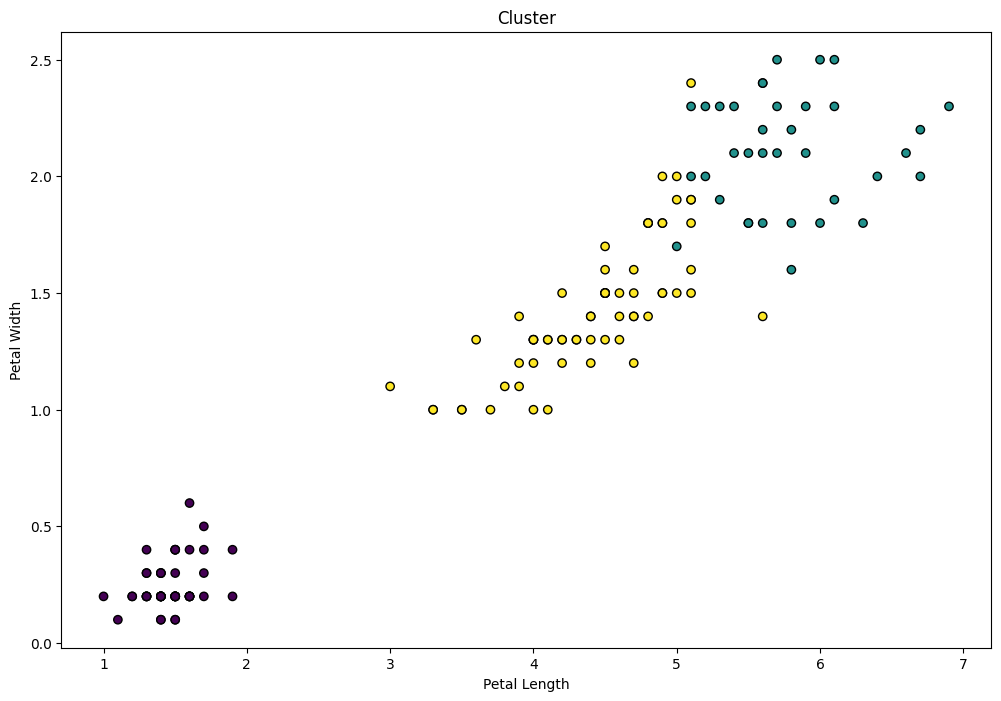

In [58]:
# Plot clusters
plt.figure(figsize = (12,8))
plt.scatter(iris_unsupervised['petal length (cm)'],
            iris_unsupervised['petal width (cm)'],
            c = labels_hierarchical, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Cluster')

# Modelling

In [59]:
# Split data
# Drop everything other than target
X = iris_data.drop('target', axis=1)
y = iris_data['target']
              
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)


In [60]:
# Instiantiate models
svc = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
models = [svc, decision_tree, random_forest]

In [61]:
# Checks for equality of the dataset
iris_data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [62]:
# X_test is an array
X_test.shape

(45, 4)

In [63]:
# Train - to check how our model is performing
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Accuracy is used because our target variable is not imbalanced
    accuracy = metrics.accuracy_score(y_test, predictions)
    print(f'This {model} has an accuracy of {accuracy}')

This SVC() has an accuracy of 1.0
This DecisionTreeClassifier() has an accuracy of 1.0
This RandomForestClassifier() has an accuracy of 1.0


In [67]:
# Save the SVC model
joblib.dump(svc, 'svc_model1.pkl')

['svc_model1.pkl']

In [65]:
X_test.iloc[24]

sepal length (cm)    7.9
sepal width (cm)     3.8
petal length (cm)    6.4
petal width (cm)     2.0
Name: 131, dtype: float64

In [66]:
y_test.iloc[24]

2